<a href="https://colab.research.google.com/github/zinebzannouti/DL-CarClassificationWithFlask/blob/main/cnn_case_study/1_Extract_Car_Images_using_web_scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

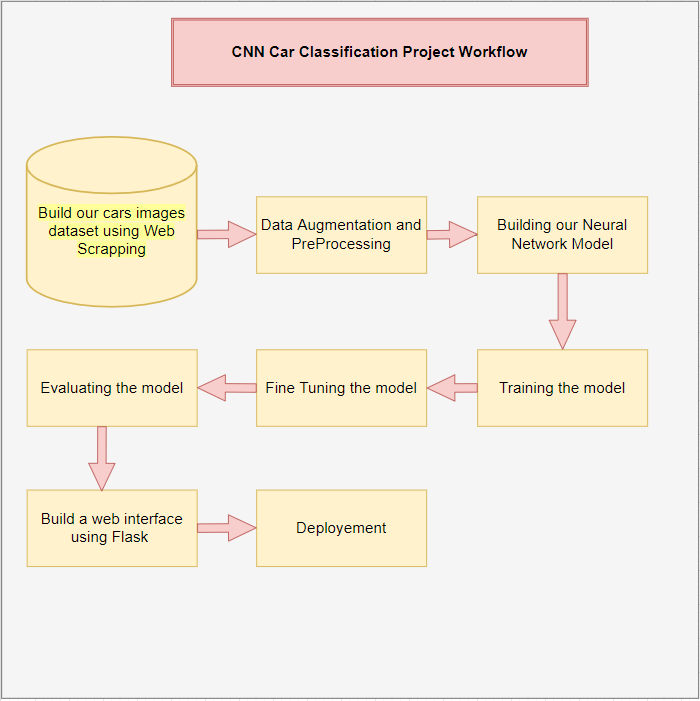

# **1-Build the Database**

# **Web Scrapping Using Selenium**

**Our Goal is to collect a car database from google image using selenium**
- Our program should take any keyword (For Example: “Audi A5”) , along with the number of images needed, and scrap that many images from Google Images on the Chrome browser.
- The images must be stored in a folder, named after the search term, and should be numbered properly so as to make them easy to access and interpret.

**What is Web Scraping? :**

- Web Scrapping also called “Crawling” or “Spidering” is the technique to gather data automatically from an online source usually from a website. While Web Scrapping is an easy way to get a large volume of data in a relatively short time frame, it adds stress to the server where the source is hosted.

- This is also one of the main reasons why many websites don’t allow scraping all on their website. However, as long as it does not disrupt the primary function of the online source, it is fairly acceptable.

**How Web Scraping is useful? :**

- Web scraping can help us extract an enormous amount of data about customers, products, people, stock markets, etc.

- One can utilize the data collected from a website such as e-commerce portal, Job portals, social media channels to understand customer’s buying patterns, employee attrition behavior, and customer’s sentiments and the list goes on.

- Most popular libraries or frameworks that are used in Python for Web – Scrapping are BeautifulSoup, Scrappy & Selenium.

**What is Selenium:**

- Selenium is an open-source web-based automation tool. Selenium primarily used for testing in the industry but It can also be used for web scraping. 
- We’ll use the Chrome browser but you can try on any browser, It’s almost the same.
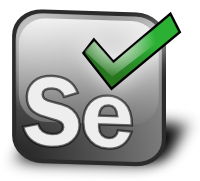

**Setup & tools:**

**Install Selenium , chromdriver**

In [1]:
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 5.1 MB/s 
     |████████████████████████████████| 140 kB 72.4 MB/s 
     |████████████████████████████████| 384 kB 71.0 MB/s 
     |████████████████████████████████| 58 kB 7.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Ge

In [2]:
!pip install webdriver_manager

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 127 kB 7.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.12
    Uninstalling urllib3-1.26.12:
      Successfully uninstalled urllib3-1.26.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.6.0 requires urllib3[socks]~=1.26, but you have urllib3 1.25.11 which is incompatible.


- You can find complete documentation on selenium here:https://selenium-python.readthedocs.io/. Documentation is very much self-explanatory so make sure to read it to leverage selenium with Python.

- Following methods will help us to find elements in a Web-page (these methods will return a list):

-find_elements_by_name

-find_elements_by_xpath

-find_elements_by_link_text

-find_elements_by_partial_link_text

-find_elements_by_tag_name

-find_elements_by_class_name

-find_elements_by_css_selector

**Import libraries**

In [3]:
import os
import selenium
from selenium import webdriver
import time
from PIL import Image
import io
import requests
from webdriver_manager.chrome import ChromeDriverManager

**Install Driver**

In [4]:
#Install driver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  


**Scroll to the end of the page**
- This line of code would help us to reach the end of the page. And then we’re giving sleep time of 5 seconds so we don’t run in problem, where we’re trying to read elements from the page, which is not yet loaded.

In [5]:
def scroll_to_end(driver):
    #driver.execute_script("window.scrollTo(0, window.scrollY + 200)")
    #time.sleep(5)#sleep_between_interactions   
    #driver.execute_script("window.scrollBy(0, 100000000)")
    #time.sleep(5)   
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(5)

**Get Image Urls**
- We need first to specify the search URL
- we’ve used google image  URL 

- Then we’re searching for Car in our Search URL Paste the link into to driver.get(“ Your Link Here ”) function and run the cell. This will open a new browser window for that link.
- After this we' need to Locate the images to be scraped from the page using driver.find_elements methode 

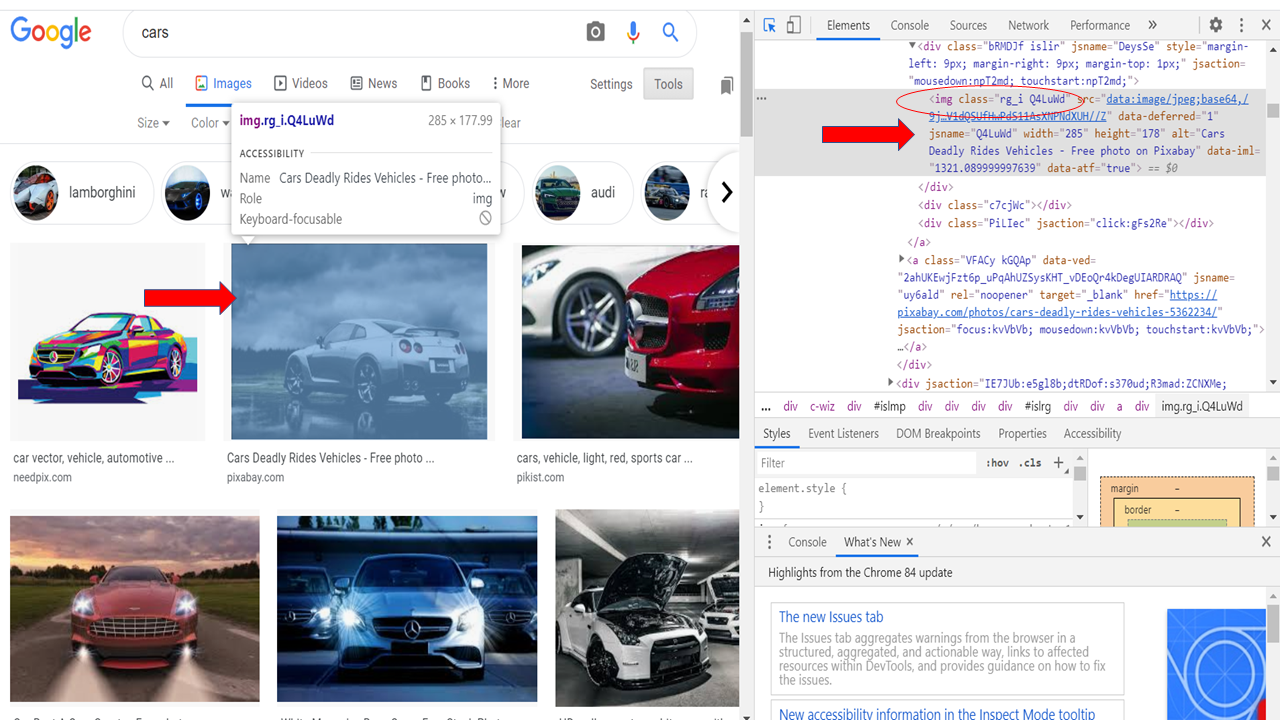!

- Now we’ll fetch all the image links present on that particular page. We will create a “list” to store those links. So, to do that go to the browser window, right-click on the page, and select ‘inspect element’ or enable the dev tools using Ctrl+Shift+I.

- Now identify any attributes such as class, id, etc. Which is common across all these images.

- In our case class =”‘Q4LuWd” is common across all these images.

 **Extract the corresponding link of each Image**
 
- So to download each image, we need to click each thumbnail and extract relevant information corresponding to that image.

- In the below snippet of code, we’re performing the following tasks-

    - Iterate through each thumbnail and then click it.
    - Make our browser sleep for 2 seconds (:P).
    - Find the unique HTML tag corresponding to that image to locate it on page
    - We still get more than one result for a particular image.  But all we’re interested in the link for that image to download.
    - So, we iterate through each result for that image and extract ‘src’ attribute of it and then see whether “https” is present in the ‘src’ or not. Since typically weblink starts with ‘https’.

In [6]:
def getImageUrls(name,totalImgs,driver):
    
    #search_url = "https://www.google.com/search?q={q}&tbm=isch&tbs=sur%3Afc&hl=en&ved=0CAIQpwVqFwoTCKCa1c6s4-oCFQAAAAAdAAAAABAC&biw=1251&bih=568"
    search_url = "https://www.google.com/search?safe=off&site=&tbm=isch&source=hp&q={q}&oq={q}&gs_l=img"
    driver.get(search_url.format(q=name))

    img_urls = set()
    img_count = 0
    results_start = 0  
    
    while(img_count<totalImgs): #Extract actual images now
        
        scroll_to_end(driver)
        
        thumbnail_results = driver.find_elements("xpath","//img[contains(@class,'Q4LuWd')]")
        totalResults=len(thumbnail_results)
        print(f"Found: {totalResults} search results. Extracting links from {results_start}:{totalResults}")
        
        for img in thumbnail_results[results_start:totalResults]:
            
            img.click()
            time.sleep(2)
            actual_images = driver.find_elements("css selector",'img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'https' in actual_image.get_attribute('src'):
                    img_urls.add(actual_image.get_attribute('src'))
            
            img_count=len(img_urls)
            
            if img_count >= totalImgs:
                print(f"Found: {img_count} image links")
                break
            else:
                print("Found:", img_count, "looking for more image links ...")                
                load_more_button = driver.find_element("css selector",".mye4qd")
                driver.execute_script("document.querySelector('.mye4qd').click();")
                results_start = len(thumbnail_results)
    return img_urls

**Write a function to download each Image**

In [7]:
def downloadImages(folder_path,file_name,url):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - COULD NOT DOWNLOAD {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        
        file_path = os.path.join(folder_path, file_name)
        
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SAVED - {url} - AT: {file_path}")
    except Exception as e:

        print(f"ERROR - COULD NOT SAVE {url} - {e}")

In [8]:
#searchNames=['AM General Hummer','Acura Integra Type R','Acura RL Sedan ','Acura TL Sedan','Acura TL Type-S ','Acura TSX Sedan','Acura ZDX Hatchback','Aston Martin V8 Vantage Convertible ','Aston Martin V8 Vantage Coupe ','Aston Martin Virage Convertible','Aston Martin Virage Coupe','Audi 100 Sedan ','Audi 100 Wagon ','Audi A5 Coupe ','Audi R8 Coupe ','Audi RS 4 Convertible','Audi S4 Sedan ','Audi S4 Sedan ','Audi S5 Convertible','Audi S5 Coupe','Audi S6 Sedan','Audi TT Hatchback','Audi TT RS Coupe 2012','Audi TTS Coupe','Audi V8 Sedan','BMW 1 Series Convertible','BMW 1 Series Coupe','BMW 3 Series Sedan','BMW 3 Series Wagon','BMW 6 Series Convertible','BMW ActiveHybrid 5 Sedan','BMW M3 Coupe','BMW M5 Sedan','BMW M6 Convertible','BMW X3 SUV','BMW X5 SUV','BMW X6 SUV','BMW Z4 Convertible','Bentley Arnage Sedan','Bentley Continental Flying Spur Sedan','Bentley Continental GT Coupe','Bentley Continental GT Coupe','Bentley Continental Supersports Conv. Convertible','Bentley Mulsanne Sedan','Bugatti Veyron 16.4 Convertible','Bugatti Veyron 16.4 Coupe','Buick Enclave SUV ','Buick Rainier SUV','Buick Regal GS ','Buick Verano Sedan','Cadillac CTS-V Sedan','Cadillac Escalade EXT Crew Cab','Cadillac SRX SUV ','Chevrolet Avalanche Crew Cab','Chevrolet Camaro Convertible','Chevrolet Cobalt SS','Chevrolet Corvette Convertible','Chevrolet Corvette Ron Fellows Edition Z06','Chevrolet Corvette ZR1','Chevrolet Express Cargo Van','Chevrolet Express Van','Chevrolet HHR SS','Chevrolet Impala Sedan','Chevrolet Malibu Hybrid Sedan','Chevrolet Malibu Sedan','Chevrolet Monte Carlo Coupe','Chevrolet Silverado 1500 Classic Extended Cab','Chevrolet Silverado 1500 Extended Cab','Chevrolet Silverado 1500 Hybrid Crew Cab','Chevrolet Silverado 1500 Regular Cab','Chevrolet Silverado 2500HD Regular Cab','Chevrolet Sonic Sedan','Chevrolet Tahoe Hybrid SUV','Chevrolet TrailBlazer SS','Chevrolet Traverse SUV','Chrysler 300 SRT-8','Chrysler Aspen SUV','Chrysler Crossfire Convertible','Chrysler PT Cruiser Convertible ','Chrysler Sebring Convertible','Chrysler Town and Country Minivan','Daewoo Nubira Wagon','Dodge Caliber Wagon','Dodge Caliber Wagon','Dodge Caravan Minivan','Dodge Challenger SRT8','Dodge Charger SRT-8','Dodge Charger Sedan','Dodge Dakota Club Cab','Dodge Dakota Crew Cab','Dodge Durango SUV','Dodge Durango SUV','Dodge Journey SUV','Dodge Magnum Wagon','Dodge Ram Pickup 3500 Crew Cab','Dodge Ram Pickup 3500 Quad Cab','Dodge Sprinter Cargo Van','Eagle Talon Hatchback','FIAT 500 Abarth','FIAT 500 Convertible','Ferrari 458 Italia Convertible','Ferrari 458 Italia Coupe','Ferrari California Convertible','Ferrari FF Coupe','Fisker Karma Sedan','Ford E-Series Wagon Van','Ford Edge SUV','Ford Expedition EL SUV','Ford F-150 Regular Cab','Ford F-150 Regular Cab ','Ford F-450 Super Duty Crew Cab','Ford Fiesta Sedan','Ford Focus Sedan','Ford Freestar Minivan','Ford GT Coupe','Ford Mustang Convertible','Ford Ranger SuperCab','GMC Acadia SUV','GMC Canyon Extended Cab','GMC Savana Van','GMC Terrain SUV','GMC Yukon Hybrid ','Geo Metro Convertible','HUMMER H2 SUT Crew Cab','HUMMER H3T Crew Cab','Honda Accord Coupe ','Honda Accord Sedan','Honda Odyssey Minivan','Honda Odyssey Minivan','Hyundai Accent Sedan','Hyundai Azera Sedan','Hyundai Elantra Sedan','Hyundai Elantra Touring Hatchback','Hyundai Genesis Sedan','Hyundai Santa Fe SUV','Hyundai Sonata Hybrid Sedan','Hyundai Sonata Sedan','Hyundai Tucson SUV','Hyundai Veloster Hatchback','Hyundai Veracruz SUV','Infiniti G Coupe IPL','Infiniti QX56 SUV','Isuzu Ascender SUV','Jaguar XK XKR','Jeep Compass SUV','Jeep Grand Cherokee SUV','Jeep Liberty SUV','Jeep Patriot SUV','Jeep Wrangler SUV','Lamborghini Aventador Coupe','Lamborghini Diablo Coupe','Lamborghini Gallardo LP 570-4 Superleggera','Lamborghini Reventon Coupe','Land Rover LR2 SUV','Land Rover Range Rover SUV','Lincoln Town Car Sedan','MINI Cooper Roadster Convertible','Maybach Landaulet Convertible','Mazda Tribute SUV ','McLaren MP4-12C Coupe','Mercedes-Benz 300-Class Convertible','Mercedes-Benz C-Class Sedan','Mercedes-Benz E-Class Sedan','Mercedes-Benz S-Class Sedan','Mercedes-Benz SL-Class Coupe','Mercedes-Benz Sprinter Van','Mitsubishi Lancer Sedan','Nissan 240SX Coupe','Nissan Juke Hatchback','Nissan Leaf Hatchback','Nissan NV Passenger Van','Plymouth Neon Coupe','Porsche Panamera Sedan','Ram C-V Cargo Van Minivan','Rolls-Royce Ghost Sedan','Rolls-Royce Phantom Drophead Coupe Convertible','Rolls-Royce Phantom Sedan','Scion xD Hatchback ','Spyker C8 Convertible ','Spyker C8 Coupe ','Suzuki Aerio Sedan ','Suzuki Kizashi Sedan ','Suzuki SX4 Hatchback ','Suzuki SX4 Sedan ','Tesla Model S Sedan ','Toyota 4Runner SUV ','Toyota Camry Sedan ','Toyota Corolla Sedan ','Toyota Sequoia SUV','Volkswagen Beetle Hatchback','Volkswagen Golf Hatchback','Volkswagen Golf Hatchback ','Volvo 240 Sedan','Volvo C30 Hatchback','Volvo XC90 SUV', 'smart fortwo Convertible']

In [9]:
searchNames=['AM General Hummer','Acura Integra Type R','Acura TL Type-S ','Acura TSX Sedan','Acura ZDX Hatchback','Audi 100 Sedan ','Audi 100 Wagon ','Audi A5 Coupe ','Audi R8 Coupe ','Audi RS 4 Convertible','Audi S4 Sedan ','Audi S4 Sedan ','Audi S5 Convertible','Audi S5 Coupe','Audi S6 Sedan','Audi TT Hatchback','Audi TT RS Coupe 2012','Audi TTS Coupe','Audi V8 Sedan','BMW 1 Series Convertible','BMW 1 Series Coupe','BMW 3 Series Sedan','BMW 3 Series Wagon','BMW 6 Series Convertible','BMW ActiveHybrid 5 Sedan' ,'BMW X6 SUV','BMW Z4 Convertible' ,'Bentley Continental GT Coupe' ,'FIAT 500 Abarth','FIAT 500 Convertible','Ferrari 458 Italia Convertible','Ferrari FF Coupe','Ford E-Series Wagon Van','Ford Fiesta Sedan','Ford Focus Sedan','Ford GT Coupe','Ford Mustang Convertible','Ford Ranger SuperCab','GMC Yukon Hybrid ','Honda Accord Sedan','Honda Odyssey Minivan','Hyundai Accent Sedan','Hyundai Elantra Sedan','Hyundai Elantra Touring Hatchback','Hyundai Genesis Sedan','Hyundai Santa Fe SUV','Hyundai Sonata Hybrid Sedan','Hyundai Sonata Sedan','Hyundai Tucson SUV','Jaguar XK XKR','Jeep Compass SUV','Jeep Grand Cherokee SUV','Jeep Wrangler SUV','Lamborghini Reventon Coupe','Land Rover Range Rover SUV','Lincoln Town Car Sedan','MINI Cooper Roadster Convertible','Mercedes-Benz 300-Class Convertible','Mercedes-Benz C-Class Sedan','Mercedes-Benz E-Class Sedan','Mercedes-Benz SL-Class Coupe','Mercedes-Benz Sprinter Van' ,'Rolls-Royce Phantom Drophead Coupe Convertible','Scion xD Hatchback ' ,'Tesla Model S Sedan ','Toyota Corolla Sedan ','Volkswagen Beetle Hatchback','Volkswagen Golf Hatchback','Volkswagen Golf Hatchback ']

**Write a function to save each Image in the Destination directory**

In [ ]:
def saveInDestFolder(searchNames,destDir,totalImgs,driver):
    for name in list(searchNames):
        path=os.path.join(destDir,name)
        if not os.path.isdir(path):
            os.mkdir(path)
        print('Current Path',path)
        totalLinks=getImageUrls(name,totalImgs,driver)
        print('totalLinks',totalLinks)

        if totalLinks is None:
            print('images not found for :',name)
            continue
        else:
            for i, link in enumerate(totalLinks):
                file_name = f"{i:150}.jpg"
                downloadImages(path,file_name,link)
            
destDir=f'/content/drive/MyDrive/Dataset/'

totalImgs=50

saveInDestFolder(searchNames,destDir,totalImgs,driver)

Found: 3 looking for more image links ...
Found: 4 looking for more image links ...
Found: 5 looking for more image links ...
Found: 6 looking for more image links ...
Found: 7 looking for more image links ...
Found: 8 looking for more image links ...
Found: 8 looking for more image links ...
Found: 8 looking for more image links ...
Found: 9 looking for more image links ...
Found: 10 looking for more image links ...
Found: 11 looking for more image links ...
Found: 12 looking for more image links ...
Found: 13 looking for more image links ...
